In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('./codeml-challenge1/train.csv')

In [3]:
df.head()

,id,x,y,z,luminosity,mass,helium_ppm
0,0,-71.007375,100.774323,-8.198832,67.562893,2548.034961,212353.541019
1,1,-74.925552,91.874221,-25.823766,50.584089,633.776097,227226.007527
2,2,-100.302987,64.899237,-71.434851,50.786286,793.732911,240853.217456
3,3,-52.174400,55.024314,-24.166729,32.247787,921.451802,251411.349973
4,4,35.268677,-17.670359,67.339614,57.656351,1773.264514,229077.364655


In [14]:
df.shape

(1000, 7)

In [4]:
# X,Y,Z are coordinates. Compute magnitude and directions
magnitude = []
direction = []

In [6]:
X = np.array(df['x'])
Y = np.array(df['y'])
Z = np.array(df['z'])

In [7]:
print(X[0], Y[0], Z[0])

-71.0073750620932 100.77432272706145 -8.198831554838947


In [9]:
magnitude = X**2 + Y **2 + Z**2
magnitude = np.sqrt(magnitude)

In [11]:
magnitude[0] == np.sqrt(X[0]**2 + Y[0]**2 + Z[0]**2)

True

In [13]:
pos_69 = np.array((X[69], Y[69], Z[69]))
pos_420 = np.array((X[420], Y[420], Z[420]))
print(pos_69, pos_420)

[-92.62952784  54.46907001 -77.00323656] [ -6.23768046 -32.33061824 -20.72418717]


In [15]:
from scipy.spatial.distance import cosine

In [16]:
cos_69 = []
cos_420 = []
for i in range(df.shape[0]):
    v = np.array((X[i], Y[i], Z[i]))
    cos_69.append(cosine(v, pos_69))
    cos_420.append(cosine(v,pos_420))

In [17]:
cos_69[69], cos_420[420] #Should be zero

(0.0, 0.0)

In [37]:
df['magnitude'] = magnitude
df['cos69'] = cos_69
df['cos_420'] = cos_420

In [38]:
df.head()

,id,x,y,z,luminosity,mass,helium_ppm,magnitude,cos69,cos_420
0,0,-71.007375,100.774323,-8.198832,67.562893,2548.034961,212353.541019,123.550525,0.222581,1.550311
1,1,-74.925552,91.874221,-25.823766,50.584089,633.776097,227226.007527,121.332509,0.131353,1.416861
2,2,-100.302987,64.899237,-71.434851,50.786286,793.732911,240853.217456,139.196042,0.004068,0.998550
3,3,-52.174400,55.024314,-24.166729,32.247787,921.451802,251411.349973,79.585639,0.078910,1.307681
4,4,35.268677,-17.670359,67.339614,57.656351,1773.264514,229077.364655,78.043224,1.912528,1.343920


In [39]:
def normalize(df, feature_name):
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return df

In [44]:
normalized_df = normalize(df, 'luminosity')
normalized_df = normalize(normalized_df, 'mass')
normalized_df = normalize(normalized_df, 'helium_ppm')

In [45]:
normalized_df.head()

,id,x,y,z,luminosity,mass,helium_ppm,magnitude,cos69,cos_420
0,0,-71.007375,100.774323,-8.198832,0.386616,0.401551,0.163582,123.550525,0.222581,1.550311
1,1,-74.925552,91.874221,-25.823766,0.289312,0.099803,0.340432,121.332509,0.131353,1.416861
2,2,-100.302987,64.899237,-71.434851,0.290471,0.125018,0.502476,139.196042,0.004068,0.998550
3,3,-52.174400,55.024314,-24.166729,0.184228,0.145150,0.628024,79.585639,0.078910,1.307681
4,4,35.268677,-17.670359,67.339614,0.329842,0.279423,0.362447,78.043224,1.912528,1.343920


                  id         x         y         z  luminosity      mass  \
id          1.000000  0.025973  0.002025  0.034241    0.022128  0.007310   
x           0.025973  1.000000 -0.595487  0.749383   -0.025646  0.016843   
y           0.002025 -0.595487  1.000000  0.066156    0.047803 -0.030708   
z           0.034241  0.749383  0.066156  1.000000    0.010802  0.007233   
luminosity  0.022128 -0.025646  0.047803  0.010802    1.000000 -0.001993   
mass        0.007310  0.016843 -0.030708  0.007233   -0.001993  1.000000   
helium_ppm  0.075302  0.179373 -0.258277  0.019399   -0.025082 -0.003145   
magnitude  -0.022508 -0.001873  0.209223  0.165999    0.025379 -0.068950   
cos69       0.013372  0.936872 -0.547370  0.724131   -0.007935  0.022682   
cos_420     0.019300  0.023695  0.748777  0.638920    0.020490 -0.006783   

            helium_ppm  magnitude     cos69   cos_420  
id            0.075302  -0.022508  0.013372  0.019300  
x             0.179373  -0.001873  0.936872  0.0236

<AxesSubplot:>

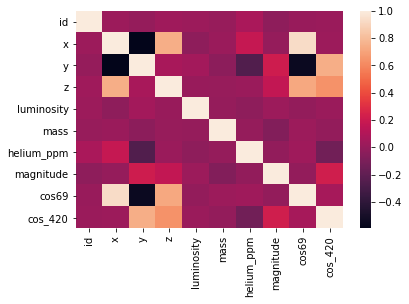

In [46]:
corr = normalized_df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [48]:
final_df = normalized_df.iloc[:, 4:]

In [49]:
final_df.head()

,luminosity,mass,helium_ppm,magnitude,cos69,cos_420
0,0.386616,0.401551,0.163582,123.550525,0.222581,1.550311
1,0.289312,0.099803,0.340432,121.332509,0.131353,1.416861
2,0.290471,0.125018,0.502476,139.196042,0.004068,0.998550
3,0.184228,0.145150,0.628024,79.585639,0.078910,1.307681
4,0.329842,0.279423,0.362447,78.043224,1.912528,1.343920


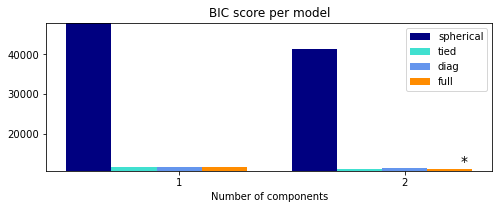

In [52]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 3)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(final_df)
        bic.append(gmm.bic(final_df))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
'''
# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)
'''

plt.show()

In [53]:
Y = clf.predict(final_df)

In [54]:
Y[69], Y[420] #Should be distinct

(1, 0)

In [55]:
#Flip the ids
constel_id = []
for c_id in Y:
    if(c_id == 1):
        constel_id.append(0)
    else:
        constel_id.append(1)

In [56]:
df_predict = pd.DataFrame(constel_id)

In [57]:
df_predict.head()

,0
0,0
1,0
2,0
3,1
4,1


In [58]:
df_predict.to_csv('./codeml-challenge1/submission2.csv')